This script was run locally on my laptop. The following files were copied to my laptop to run it:
- `/cbica/projects/clinical_dmri_benchmark/results/qsirecon_outputs/reconstructed_bundles_GQIautotrack.csv`
- `/cbica/projects/clinical_dmri_benchmark/results/qsirecon_outputs/reconstructed_bundles_CSDautotrack.csv`
- `/cbica/projects/clinical_dmri_benchmark/results/qsirecon_outputs/reconstructed_bundles_SS3Tautotrack.csv`

These are the outputs of the following script:
`clinical_dmri_benchmark/analysis/fractions_reconstructed_bundles/get_reconstructed_bundles.py`

In [1]:
# imports
import pandas as pd
import seaborn as sns
import os
import matplotlib as mpl
from matplotlib import pyplot as plt

In [ ]:
# Prep csv files
# Read all csv files and drop the first three columns (index, subject_id, run)
CSV_ROOT = "/Users/amelie/Datasets/clinical_dmri_benchmark/fractions"

recon_df_GQI = pd.read_csv(os.path.join(CSV_ROOT, "reconstructed_bundles_GQIautotrack.csv")).iloc[:, 3:]
recon_df_CSD = pd.read_csv(os.path.join(CSV_ROOT, "reconstructed_bundles_CSDautotrack.csv")).iloc[:, 3:]
recon_df_SS3T = pd.read_csv(os.path.join(CSV_ROOT, "reconstructed_bundles_SS3Tautotrack.csv")).iloc[:, 3:]

fraction_df_GQI = pd.DataFrame({"Bundle": recon_df_GQI.mean().index, 
                    "Reconstruction Fraction": recon_df_GQI.mean().values,
                    "reconstruction": "GQI"})
fraction_df_CSD = pd.DataFrame({"Bundle": recon_df_CSD.mean().index, 
                    "Reconstruction Fraction": recon_df_CSD.mean().values,
                    "reconstruction": "CSD"})
fraction_df_SS3T = pd.DataFrame({"Bundle": recon_df_SS3T.mean().index, 
                    "Reconstruction Fraction": recon_df_SS3T.mean().values,
                    "reconstruction": "SS3T"})
fraction_df = pd.concat([fraction_df_GQI, fraction_df_CSD, fraction_df_SS3T], ignore_index=True)
fraction_df["Bundle"] = fraction_df["Bundle"].str.replace("Association", "").str.replace("ProjectionBasalGanglia", "").str.replace("ProjectionBrainstem", "").str.replace("Commissure", "").str.strip()

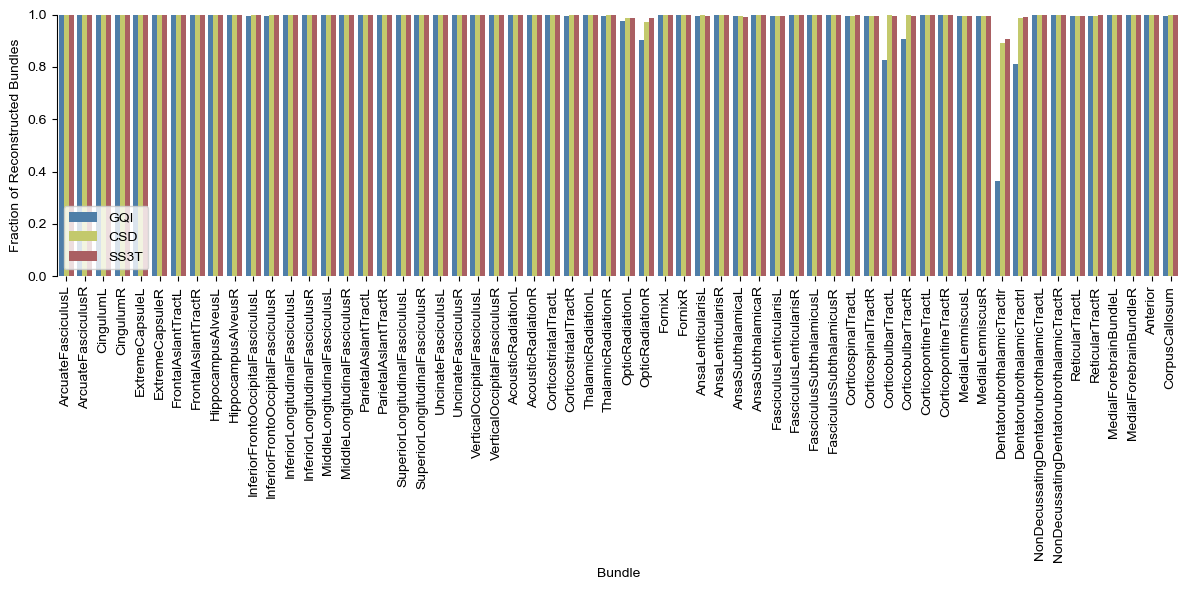

In [4]:
# Plot the fractions

# set font, colors and figure size
mpl.rcParams["font.family"] = "Arial"
my_palette = sns.color_palette([(64/255, 127/255, 183/255), (208/255, 217/255, 92/255), (182/255, 82/255, 86/255)])
sns.set_palette(my_palette)
plt.figure(figsize=(12, 6))

# plot
sns.barplot(data=fraction_df, x="Bundle", y="Reconstruction Fraction", hue="reconstruction", hue_order=["GQI", "CSD", "SS3T"], edgecolor="none")

# fine tune the plot
plt.xticks(rotation=90)
plt.ylabel("Fraction of Reconstructed Bundles")
plt.ylim(0, 1)
plt.xlabel("Bundle")
plt.legend(loc="lower left")
plt.tight_layout()
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().spines["left"].set_visible(True)
plt.savefig("../../figures/reconstruction_fractions.svg")
plt.show()